# Gaussian Mixture Model (GMM)

This code uses GMM to segment an image into different regions based on their color similarity.

First, it loads an image and converts it to a format that Python can understand. Then, it reshapes the image into a 2D array of pixels. The reshaping is important because the original image is loaded as a 3-dimensional array, representing the image's height, width, and color channels (commonly RGB channels). However, the GMM algorithm requires the input data to be in a 2-dimensional format, where each row corresponds to a single data point (in this case, a pixel) and each column represents a feature (such as color intensity values). By reshaping the image into a 2D array, we convert it into a suitable format for feeding into the GMM algorithm.

Next, it applies the GMM algorithm from scikit-learn library, which helps in finding underlying patterns in the data.

After fitting the GMM to the image data, it predicts the cluster labels for each pixel, essentially grouping similar pixels together.

After applying GMM and obtaining cluster labels for each pixel, the labels represent the assignment of each pixel to a specific cluster or region based on color similarity.These labels are typically stored as a 1-dimensional array, where each element corresponds to a pixel in the flattened version of the image. To visualize the segmented image properly, we reshape the 1-dimensional array of cluster labels back into  a 2D array, ensuring it matches the dimensions of the original image in terms of height and width, while disregarding color channels.
This reshaping aligns the segmented labels with the original image dimensions, where each element in the 2D array represents the cluster label assigned to a pixel at the corresponding position in the original image grid.

The code then displays both the original image and the segmented image side by side using matplotlib, allowing us to visually compare the segmentation results.

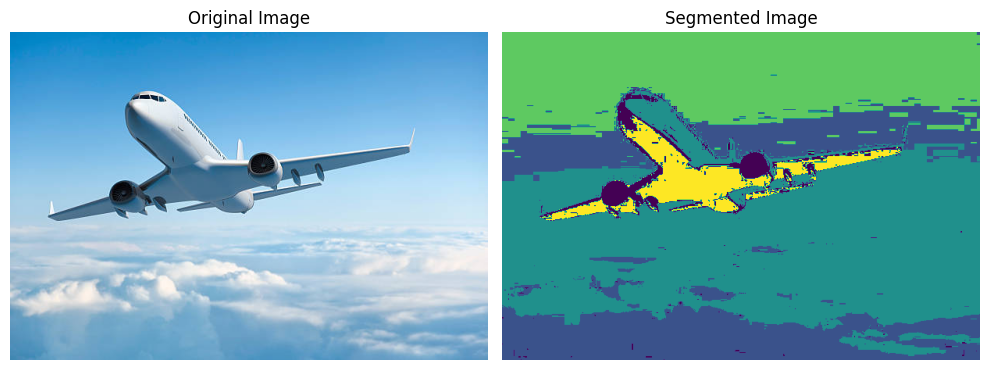

In [1]:
import numpy as np
import cv2
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

def gmm_segmentation(image, num_components):
    # Reshape image to 2D array (rows, cols, channels)
    pixels = image.reshape((-1, 3))  # Assuming 3 color channels (RGB)

    # Fit GMM
    gmm = GaussianMixture(n_components=num_components, covariance_type='full', random_state=42)
    gmm.fit(pixels)

    # Predict cluster labels
    labels = gmm.predict(pixels)

    # Reshape labels to original image shape
    segmented_image = labels.reshape(image.shape[:2])

    return segmented_image

# Load image
image = cv2.imread('/content/aeroplane.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert image to RGB (optional)

# Perform GMM segmentation
num_components = 5  # Number of Gaussian components
segmented_image = gmm_segmentation(image, num_components)

# Plot original and segmented images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='viridis')  # You can change the colormap as needed
plt.axis('off')
plt.title('Segmented Image')

plt.tight_layout()
plt.show()

# How many clusters to choose?

## Bayesian information criterion (BIC)

The BIC, or Bayesian information criterion, evaluates how well the GMM predicts the observed data points. BIC penalizes models with a higher number of clusters. This penalty helps prevent overfitting by favoring simpler models that can generalize better to unseen data.

The goal when using BIC is to minimize its value. A lower BIC indicates a better balance between model fit and complexity. By choosing the number of clusters that minimizes the BIC score, you effectively select the model that best captures the underlying structure of the data while avoiding unnecessary complexity.

The gradient of the BIC scores curve provides valuable information about how the BIC score changes with respect to the number of clusters. By examining the gradient, we can identify points where the BIC score is changing rapidly, indicating significant improvements or deteriorations in model fit as the number of clusters varies.

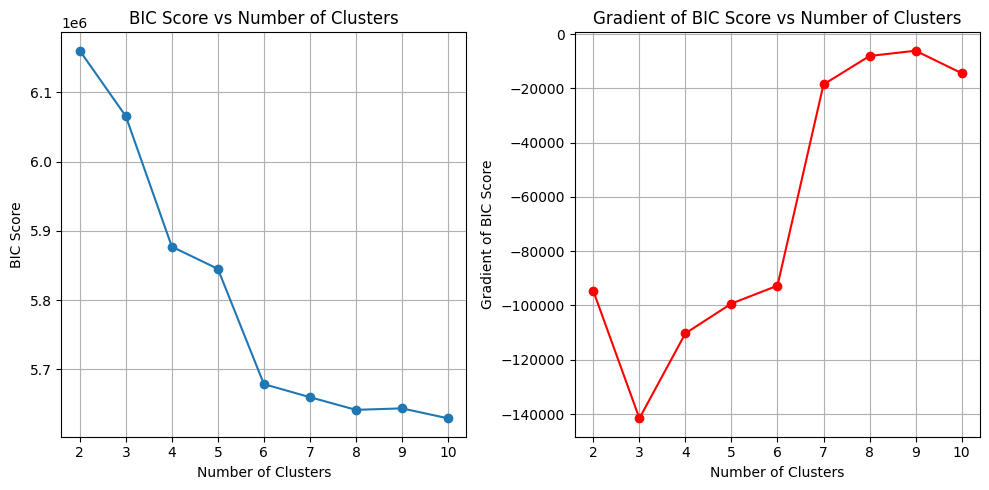

In [ ]:
# Calculate BIC scores for different numbers of clusters
num_clusters_list = range(2, 11)  # Range of number of clusters to evaluate
bic_scores = []

pixels = image.reshape((-1, 3))  # Reshape image to 2D array (rows, cols, channels)

for n_clusters in num_clusters_list:
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42)
    gmm.fit(pixels)
    bic_scores.append(gmm.bic(pixels))

# Compute the gradient of BIC scores
bic_gradients = np.gradient(bic_scores)

# Plot BIC scores and their gradient vs number of clusters
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(num_clusters_list, bic_scores, marker='o')
plt.title('BIC Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(num_clusters_list, bic_gradients, marker='o', color='r')
plt.title('Gradient of BIC Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Gradient of BIC Score')
plt.grid(True)

plt.tight_layout()
plt.show()

Next, we will use Silhouette score to find the optimal number of clusters. For this purpose, we use the command !pip install spikeinterface is used to install the SpikeInterface library using pip, which is a package management system used to install and manage software packages written in Python.

In [1]:
!pip install spikeinterface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.1/803.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.1/210.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 638.4/638.4 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 48.9 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=0e79d8cda39ee289a876cd230b8e9b8ed3d83ff9193f231a89d5978e993c73a6
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree


## Silhouette Scores

The following code calculates the silhouette scores for different numbers of clusters using the SpikeInterface library. Silhouette score measures how similar an object is to its own cluster compared to other clusters. The code iterates through a range of cluster numbers, computes the silhouette score for each clustering configuration, and then plots the silhouette scores against the number of clusters. This helps visualize the optimal number of clusters for the given data.

Silhouette score ranges from -1 to 1. A score close to +1 indicates that the object is well-clustered. A score close to 0 indicates overlapping clusters. A score close to -1 indicates that the object may have been assigned to the wrong cluster.







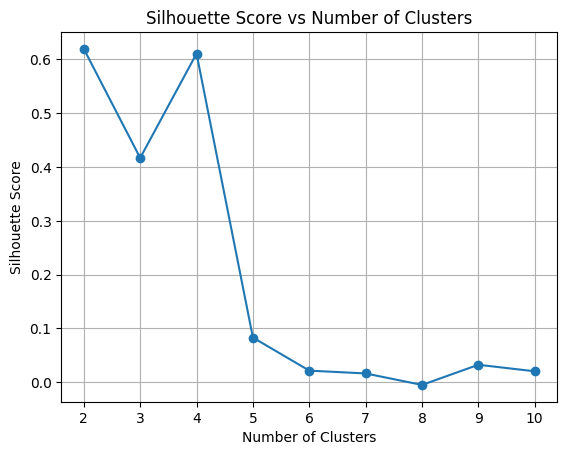

In [2]:
import spikeinterface.qualitymetrics as sqm

# Calculate silhouette scores for different numbers of clusters
num_clusters_list = range(2, 11)  # Range of number of clusters to evaluate
silhouette_scores = []

# Assuming you have image, all_pcs, and all_labels defined
pixels = image.reshape((-1, 3))  # Reshape image to 2D array (rows, cols, channels)

for n_clusters in num_clusters_list:
    labels = gmm_segmentation(image, n_clusters).reshape(-1)
    score = sqm.simplified_silhouette_score(all_pcs=pixels, all_labels=labels, this_unit_id=0)
    silhouette_scores.append(score)

# Plot silhouette score vs number of clusters
plt.plot(num_clusters_list, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()
